# scRNAsed seqFISH integration

Objectives:

# Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
%qtconsole

In [13]:
data_dir = r"../data/tasic_scRNAseq/"
scRNAseq_path = os.path.join(data_dir, "tasic_training_b2.txt")
seqFISH_path = os.path.join(data_dir, "seqfish_cortex_b2_testing.txt")
scRNAseq_labels_path = os.path.join(data_dir, "tasic_labels.tsv")
seqfish_labels_path = os.path.join(data_dir, "seqfish_labels.tsv")

### scRNAseq data

txt file of normalized scRNAseq data for `113 genes x 1723 cells`

In [33]:
scRNAseq = pd.read_csv(scRNAseq_path, sep='\t', header=None, index_col=0)
scRNAseq.index.name= 'genes'
scRNAseq = scRNAseq.transpose()
scRNAseq.index.name = 'cells'
scRNAseq.head()

genes,abca15,abca9,acta2,adcy4,aldh3b2,amigo2,ankle1,ano7,anxa9,arhgef26,...,spag6,sumf2,tbr1,tnfrsf1b,vmn1r65,vps13c,wrn,zfp182,zfp715,zfp90
cells,,,,,,,,,,,,,,,,,,,,,
1,11.0,22.0,15.0,12.0,27.0,23.0,29.0,11.0,15.0,59.0,...,42.0,42.0,39.0,28.0,59.0,32.0,40.0,51.0,40.0,72.0
2,42.0,46.0,47.0,45.0,49.0,43.0,46.0,42.0,48.0,43.0,...,45.0,59.0,41.0,66.0,39.0,31.0,43.0,43.0,41.0,49.0
3,17.0,22.0,15.0,12.0,27.0,101.0,72.0,16.0,15.0,75.0,...,42.0,67.0,41.0,19.0,52.0,38.0,40.0,53.0,41.0,73.0
4,42.0,46.0,42.0,45.0,49.0,43.0,37.0,42.0,42.0,43.0,...,48.0,39.0,43.0,64.0,22.0,34.0,47.0,80.0,43.0,49.0
5,35.0,39.0,34.0,38.0,42.0,72.0,61.0,34.0,33.0,36.0,...,45.0,33.0,41.0,34.0,23.0,34.0,45.0,43.0,41.0,46.0


### seqFISH data

txt file of normalized seqFISH data for `113 genes x 1597 cells`

In [34]:
seqFISH = pd.read_csv(seqFISH_path, sep='\t', header=None, index_col=0)
seqFISH.index.name= 'genes'
seqFISH = seqFISH.transpose()
seqFISH.index.name = 'cells'
seqFISH.head()

genes,abca15,abca9,acta2,adcy4,aldh3b2,amigo2,ankle1,ano7,anxa9,arhgef26,...,spag6,sumf2,tbr1,tnfrsf1b,vmn1r65,vps13c,wrn,zfp182,zfp715,zfp90
cells,,,,,,,,,,,,,,,,,,,,,
1,68.0,41.0,25.0,39.0,101.0,93.0,41.0,44.0,53.0,38.0,...,41.0,36.0,101.0,61.0,38.0,63.0,36.0,97.0,32.0,35.0
2,49.0,42.0,23.0,54.0,47.0,64.0,42.0,68.0,40.0,40.0,...,101.0,36.0,101.0,42.0,39.0,31.0,38.0,35.0,33.0,35.0
3,50.0,38.0,16.0,37.0,41.0,93.0,76.0,50.0,43.0,42.0,...,39.0,46.0,101.0,33.0,54.0,43.0,31.0,36.0,86.0,46.0
4,39.0,36.0,21.0,18.0,52.0,93.0,40.0,48.0,39.0,45.0,...,39.0,33.0,101.0,49.0,60.0,34.0,51.0,36.0,18.0,37.0
5,31.0,47.0,29.0,37.0,101.0,93.0,46.0,50.0,31.0,46.0,...,62.0,0.0,101.0,28.0,51.0,47.0,24.0,26.0,35.0,40.0


### scRNAseq labels

tsv file of cell type labels for scRNAseq

In [14]:
scRNAseq_labels = pd.read_csv(scRNAseq_labels_path, sep='\t', header=None)
scRNAseq_labels.head()

,0,1,2
0,Astrocyte,Calb2_tdTpositive_cell_46,upper
1,Astrocyte,Calb2_tdTpositive_cell_48,upper
2,Astrocyte,Calb2_tdTpositive_cell_50,lower
3,Astrocyte,Calb2_tdTpositive_cell_53,lower
4,Astrocyte,Calb2_tdTpositive_cell_58,lower


In [18]:
phenotypes = list(scRNAseq_labels.iloc[:,0].unique())
print(phenotypes)

['Astrocyte', 'GABA-ergic Neuron', 'Endothelial Cell', 'Glutamatergic Neuron', 'Microglia', 'Oligodendrocyte.3', 'Oligodendrocyte.2', 'Oligodendrocyte.1']


## Exploratory Data Analysis

In [42]:
# label re-encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(phenotypes)

y_true = le.transform(scRNAseq_labels.iloc[:,0])

# for coloring phenotypes on UMAPprojections
colors = [sns.color_palette()[x] for x in y_true]

In [43]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(scRNAseq)
embedding.shape

(1723, 2)

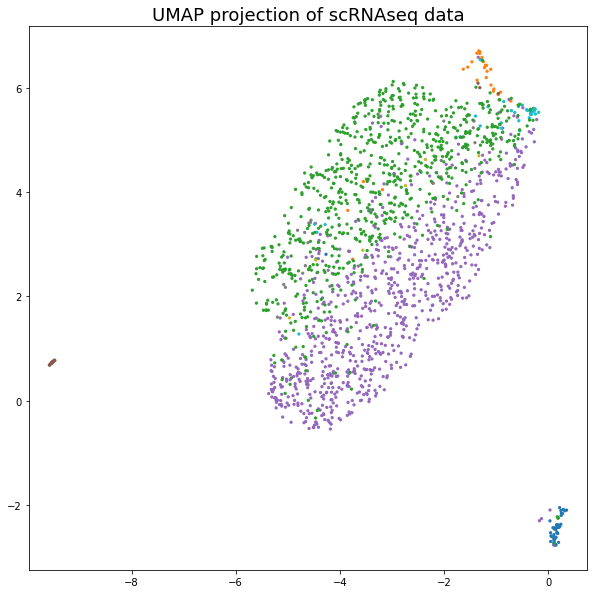

In [48]:
size_points = 5.0
colormap = 'tab10'
marker='o'

plt.figure(figsize=[10,10])
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_true, cmap=colormap, marker=marker, s=size_points)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of scRNAseq data', fontsize=18);

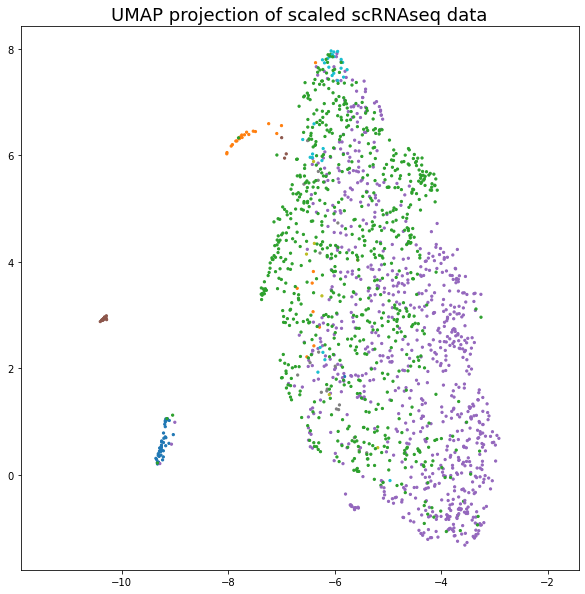

In [50]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(scRNAseq)

reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
embedding.shape

plt.figure(figsize=[10,10])
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_true, cmap=colormap, marker=marker, s=size_points)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of scaled scRNAseq data', fontsize=18);

## Test kNN

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(clf, X, y_true, cv=10)
scores

/home/alexis/Programmes/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.76300578, 0.90751445, 0.8150289 , 0.80232558, 0.86627907,
       0.84302326, 0.86046512, 0.9127907 , 0.83139535, 0.88953488])

In [60]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.11)


## Model selection

## Test different classifiers

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create different classifiers.
C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    
# specify parameters and distributions to sample from
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

In [65]:
from time import time
from scipy.stats import loguniform

clf = SVC()

# specify parameters and distributions to sample from
param_dist = {'C': loguniform(1e-2, 1e1),
              'gamma': loguniform(1e-2, 1e1)}

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   n_jobs=7,
                                   scoring='accuracy')

start = time()
random_search.fit(X, y_true)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(random_search.cv_results_)

RandomizedSearchCV took 123.84 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.901 (std: 0.025)
Parameters: {'C': 9.323361118368346, 'gamma': 0.015713257946006975}

Model with rank: 2
Mean validation score: 0.867 (std: 0.026)
Parameters: {'C': 0.4391168604199646, 'gamma': 0.013393034280862054}

Model with rank: 3
Mean validation score: 0.773 (std: 0.030)
Parameters: {'C': 0.13789397234831552, 'gamma': 0.015129251254630435}



In [ ]:
clf = SVC(C=9.32, gamma=0.0157)
Xelim = np.copy(X) # the X data that will be pruned

elimination_report = []

Nvar = X.shape[1]
for i in range(Nvar-1):
    print("Removing {} variables".format(i+1), end="    ")
    scores = []
    for var in range(Xelim.shape[1]):
        # we remove only one variabme at a time
        Xtest = np.delete(Xelim, var, axis=1)
        score = cross_val_score(clf, Xtest, y_true, cv=5, n_jobs=5).mean()
        #print("var {}/{}: {}".format(var+1, Xelim.shape[1], score))
        scores.append(score)
        
    # find the variable that was the less usefull for the model
    maxi_score = max(scores)
    worst_var = scores.index(maxi_score)
    print("eliminating var n°{}, the score was {:.3f}".format(worst_var, maxi_score))
    elimination_report.append([worst_var, maxi_score])
    # eliminate this variable for next round
    Xelim = np.delete(Xelim, worst_var, axis=1)
    

In [94]:
elimination_report = np.array(elimination_report)
np.savetxt("./elimination_report.csv", elimination_report, delimiter=',', header='var index, score', comments='', fmt=['%d', '%f'])

Text(0, 0.5, 'score')

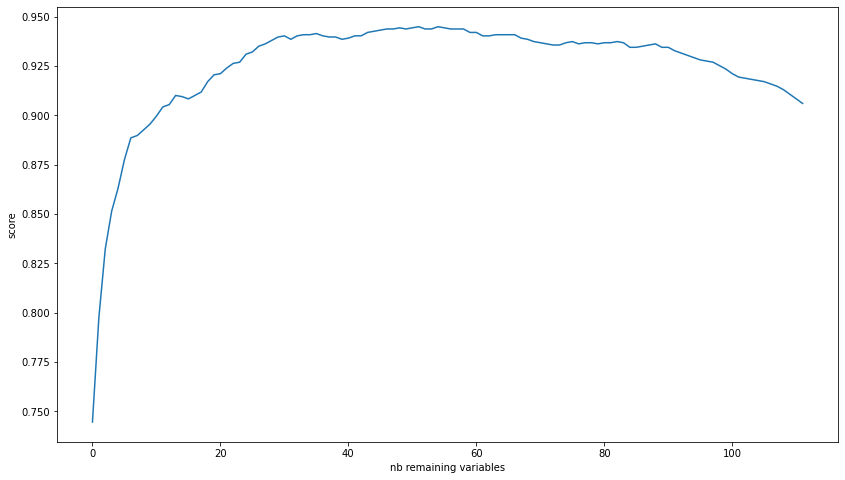

In [99]:
plt.figure(figsize=(14,8))
plt.plot(elimination_report[::-1,1]);
plt.xlabel('nb remaining variables')
plt.ylabel('score')

First the funny thing is that the score is non monotonic wrt the number of remaining variable.  
It looks like we could keep only 29 genes! (last maximum) 

## Spatial analysis

perform cross-correlation for each gene channel

for each predicted cell in seqFISH substract the typical signal of it's cell type, then look at spatial organisation of those differences.

reconstruct spatial network, then for each cell aggregate sorrounding gene expression profiles, do mean, maybe add variance across neighboors, then clustering.  
advantage: no prior on nulber of domains, can use different clustering method